In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
df_train=pd.read_csv('fashion-mnist_train.csv')
df_test=pd.read_csv('fashion-mnist_test.csv')

In [3]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_test.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [7]:
df_train.shape

(60000, 785)

In [8]:
df_test.shape

(10000, 785)

In [9]:
train=np.array(df_train, dtype='float32')
test=np.array(df_test, dtype='float32')

0.0

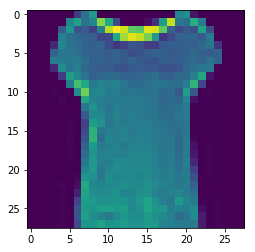

In [10]:
import random
i=random.randint(1,60000)
plt.imshow(train[i,1:].reshape(28,28))
label=train[i,0]
label

In [11]:
#10 classes
#T-shirt, trouser, pullover, coat,dress, scandal, shirt, sneaker,beg,ankle boot 

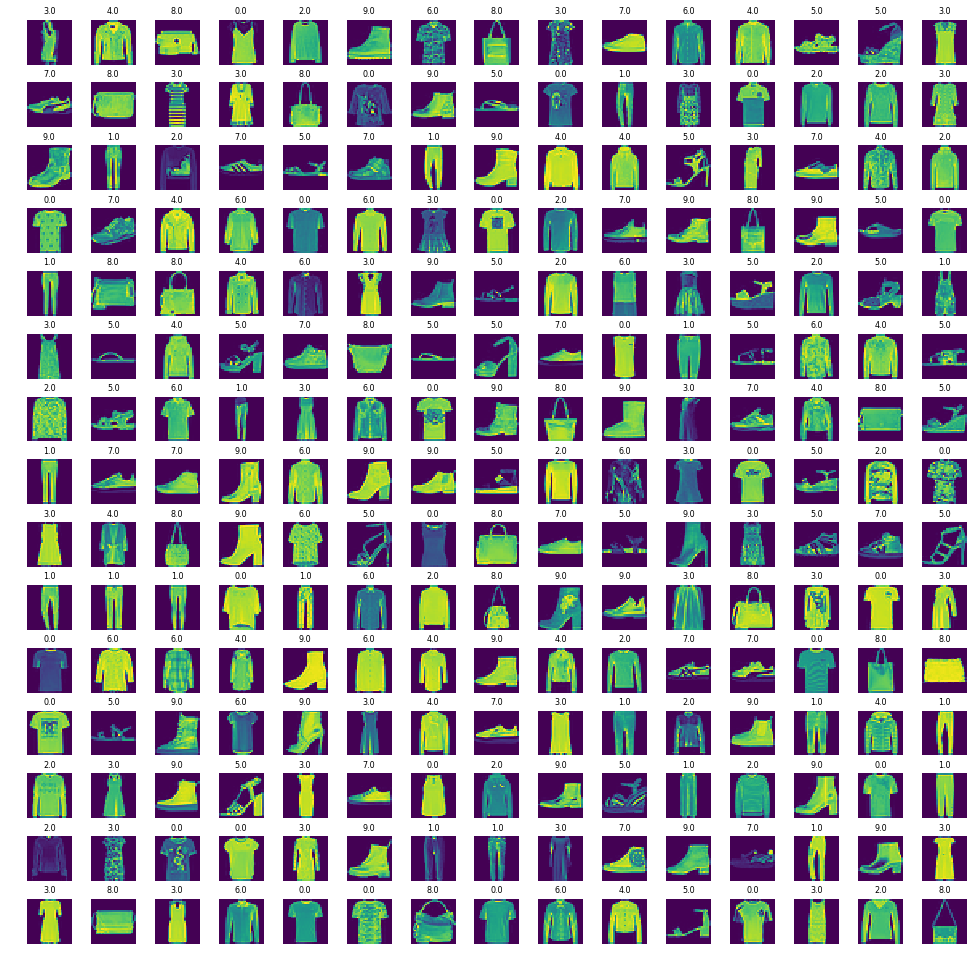

In [12]:
W_grid=15
L_grid=15
fig, axes = plt.subplots(W_grid, L_grid, figsize = (17,17))
axes = axes.ravel()
n_train=len(train)
for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_train)
    axes[i].imshow(train[index, 1:].reshape((28,28)))
    axes[i].set_title(train[index, 0], fontsize = 8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

In [13]:
#training the model
X_train=train[:,1:]/255
y_train=train[:,0]

In [14]:
X_test=test[:,1:]/255
y_test=test[:,0]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [17]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [18]:
X_train.shape

(48000, 28, 28, 1)

In [19]:
X_test.shape

(10000, 28, 28, 1)

In [20]:
X_validate.shape

(12000, 28, 28, 1)

In [21]:
#neural network library
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [22]:
cnn_model = Sequential()

In [23]:
cnn_model.add(Conv2D(32,3,3, input_shape = (28,28,1), activation = 'relu'))

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\Ali Haider\anaconda33\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [24]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [25]:
cnn_model.add(Flatten())

In [26]:
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))

C:\Users\Ali Haider\anaconda33\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [27]:
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

C:\Users\Ali Haider\anaconda33\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


In [28]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [29]:
epochs = 2

In [30]:
cnn_model.fit(X_train, y_train, batch_size = 512, nb_epoch = epochs, verbose =1, validation_data = (X_validate, y_validate))

C:\Users\Ali Haider\anaconda33\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 289s 6ms/step - loss: 0.9253 - acc: 0.7154 - val_loss: 0.4980 - val_acc: 0.8341
Epoch 2/2
48000/48000 [==============================] - 274s 6ms/step - loss: 0.4518 - acc: 0.8426 - val_loss: 0.4346 - val_acc: 0.8493


In [33]:
#Evaluating the model
evaluation = cnn_model.evaluate(X_test, y_test)
print('test accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 40s 4ms/step
test accuracy : 0.853


In [ ]:
predicted_classes=cnn_model.predict_classes(X_test)

In [ ]:
predicted_classes

In [ ]:
L=5
W=5
fig, axes = plt.subplots(L,W,figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title('prediction classs = {:0,1f}/n True class = {:0,1f}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=0.5)

In [ ]:
#confussion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, predicted_classes)
plt.figure(figure = (14,10))
sns.heatmap(cm, annot=True  )

In [ ]:
#classification reprot
from sklearn.metrics import classification_report
num_classes = 10
target_names = ['class {}'.format(i) for i in range(num_classes)]

print(classification)report(y_test, predicted_classes, target_names = target_names)

In [32]:
#evaluating the model